In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bs
import requests
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud,STOPWORDS

source = requests.get('https://scomedy.com/quotes?page=1')

soup = bs(source.text, 'lxml')

In [4]:
#print(soup.prettify())

In [38]:
quote_list = []
comedian_list = []
view_list = []
theme_list = []

for i in range(1260):
  
    url = 'https://scomedy.com/quotes?page=' + str(i) #Affichage de toutes les pages du site scomedy
    source = requests.get(url) #Reqête de chaque url
    soup = bs(source.text, 'lxml')
    
    quotes = soup.find_all('div', {'class':'quote'})
    

    for quote in quotes:
        
        citation = quote.find('p').text
        quote_list.append(citation)
        
        comedian = quote.find('div',class_='comedian').text.split("\xa0")[1].split('\n')[0]
        comedian_list.append(comedian)
        
        view = int(quote.find('span',class_='views').text.split(" ")[1])
        view_list.append(view)
        
        tags_for_this_quote = []
        if quote.find('li'): 
        
            for element in quote.find_all('li'):
                theme = element.text.split("#")[1]
                tags_for_this_quote.append(theme)           
        else:
            tags_for_this_quote= None
            
        theme_list.append(tags_for_this_quote)
dict_quote ={'citation':quote_list,'auteur':comedian_list,'nbre_vues':view_list,'theme':theme_list}
quote_df = pd.DataFrame(dict_quote)
quote_df

,citation,auteur,nbre_vues,theme
0,"Well, birthdays are merely symbolic of how ano...",Jerry Seinfeld,1334,[birthday]
1,My perfect date night: I pick you up. In my Ki...,Aziz Ansari,1025,"[danger, dating, restaurants]"
2,Jack and Jill went up the hill Both with a buc...,Andrew Dice Clay,979,None
3,"I mean, they don't grade fathers. But if your ...",Chris Rock,890,None
4,"“Money doesn’t buy happiness.” Uh, do you live...",Daniel Tosh,849,[happiness]
...,...,...,...,...
18883,Whenever I see an autobiography for sale in th...,Demetri Martin,4,None
18884,I saw a door that said exit only. So I entered...,Demetri Martin,4,None
18885,"I bought a dictionary. First thing I did was, ...",Demetri Martin,4,None
18886,When someone asks you the question 'Are you ti...,Demetri Martin,4,None


### <span style="color: #030aa4">Vérification des données</span>

In [47]:
#Affichage des doublons
doublons = quote_df.loc[quote_df.citation.duplicated(), :]

doublons.index

Int64Index([   15,    16,    17,    18,    19,    20,    21,    22,    23,
               24,
            ...
            18086, 18117, 18298, 18345, 18464, 18486, 18548, 18630, 18635,
            18647],
           dtype='int64', length=131)

In [49]:
#Suppression des doublons
quote_df = quote_df.drop(doublons.index)

quote_df

,citation,auteur,nbre_vues,theme
0,"Well, birthdays are merely symbolic of how ano...",Jerry Seinfeld,1334,[birthday]
1,My perfect date night: I pick you up. In my Ki...,Aziz Ansari,1025,"[danger, dating, restaurants]"
2,Jack and Jill went up the hill Both with a buc...,Andrew Dice Clay,979,None
3,"I mean, they don't grade fathers. But if your ...",Chris Rock,890,None
4,"“Money doesn’t buy happiness.” Uh, do you live...",Daniel Tosh,849,[happiness]
...,...,...,...,...
18883,Whenever I see an autobiography for sale in th...,Demetri Martin,4,None
18884,I saw a door that said exit only. So I entered...,Demetri Martin,4,None
18885,"I bought a dictionary. First thing I did was, ...",Demetri Martin,4,None
18886,When someone asks you the question 'Are you ti...,Demetri Martin,4,None


In [50]:
quote_df[quote_df['theme'].isnull()].count()
#Pourcentage
# NLP : extraire des thèmes de ces données manquantes depuis citation

citation     13424
auteur       13424
nbre_vues    13424
theme            0
dtype: int64

In [105]:
quote_df.explode('theme').dtypes

citation     object
auteur       object
nbre_vues     int64
theme        object
dtype: object

### <span style="color: #030aa4">Nombre d'humoristes</span>

In [52]:
print("Il y a",len(quote_df.groupby('auteur').count()),"artistes.")

Il y a 291 artistes.


In [98]:
Genre_df = pd.read_csv('auteurs.csv')

NbreAuteurParGenre = Genre_df.groupby('genre').count()

NbreAuteurParGenre['Pourcentage']=(NbreAuteurParGenre['auteur']/NbreAuteurParGenre['auteur'].sum())*100

NbreAuteurParGenre

,auteur,Pourcentage
genre,,
Femme,41,14.089347
Homme,250,85.910653


### <span style="color: #030aa4">Nombre de vues des citations selon le genre</span>

In [94]:
data= pd.merge(Genre_df,quote_df)

CitationParGenre = data.loc[:,('genre','nbre_vues')]\
                       .groupby('genre').sum()

CitationParGenre['Pourcentage_nbre_vues']=(CitationParGenre['nbre_vues']/CitationParGenre['nbre_vues'].sum())*100

CitationParGenre

,nbre_vues,Pourcentage_nbre_vues
genre,,
Femme,55476,7.860073
Homme,650319,92.139927


### <span style="color: #030aa4">Nombre de citations par humoriste</span>

In [86]:
Nbre_citation_auteur = quote_df.loc[ : , ('citation','auteur')]\
                               .groupby('auteur').count()

Nbre_citation_auteur.sort_values(by="citation", ascending=False)

,citation
auteur,
Steven Wright,618
Demetri Martin,537
George Carlin,505
Jeff Foxworthy,460
Rodney Dangerfield,410
...,...
Mark Curry,1
Steve Hofstetter,1
Maz Jobrani,1


### <span style="color: #030aa4">Nombre de citations Homme/Femme</span>

In [101]:
NombreCitationHommeFemme = data.loc[:,('genre','citation')]\
                               .groupby('genre').count()

NombreCitationHommeFemme["Pourcentage"]=(NombreCitationHommeFemme['citation']/NombreCitationHommeFemme['citation'].sum())*100

NombreCitationHommeFemme

,citation,Pourcentage
genre,,
Femme,1787,9.52711
Homme,16970,90.47289


### <span style="color: #030aa4">Nombre de thèmes</span>

In [54]:
quote_df_theme = quote_df.explode('theme')\
                         .loc[ : , ('theme','nbre_vues')]\
                         .groupby('theme').sum().reset_index()\
                         .sort_values(by='nbre_vues',ascending=False)

print("Il y a",len(quote_df_theme), "thèmes.")

Il y a 201 thèmes.


In [79]:
quote_df_theme.head(60)

,theme,nbre_vues
61,dogs,6533
49,dating,6205
136,new york,5965
158,religion,5459
64,dreams,5354
28,business,5147
149,politics,4923
19,audience,4782
84,girlfriends,4755
65,driving,4716


### <span style="color: #030aa4">Quels thèmes plaisent le plus ?</span>

#### <span style="color: #a40334"> Quels sont les thèmes ayant le plus de succès ?</span>

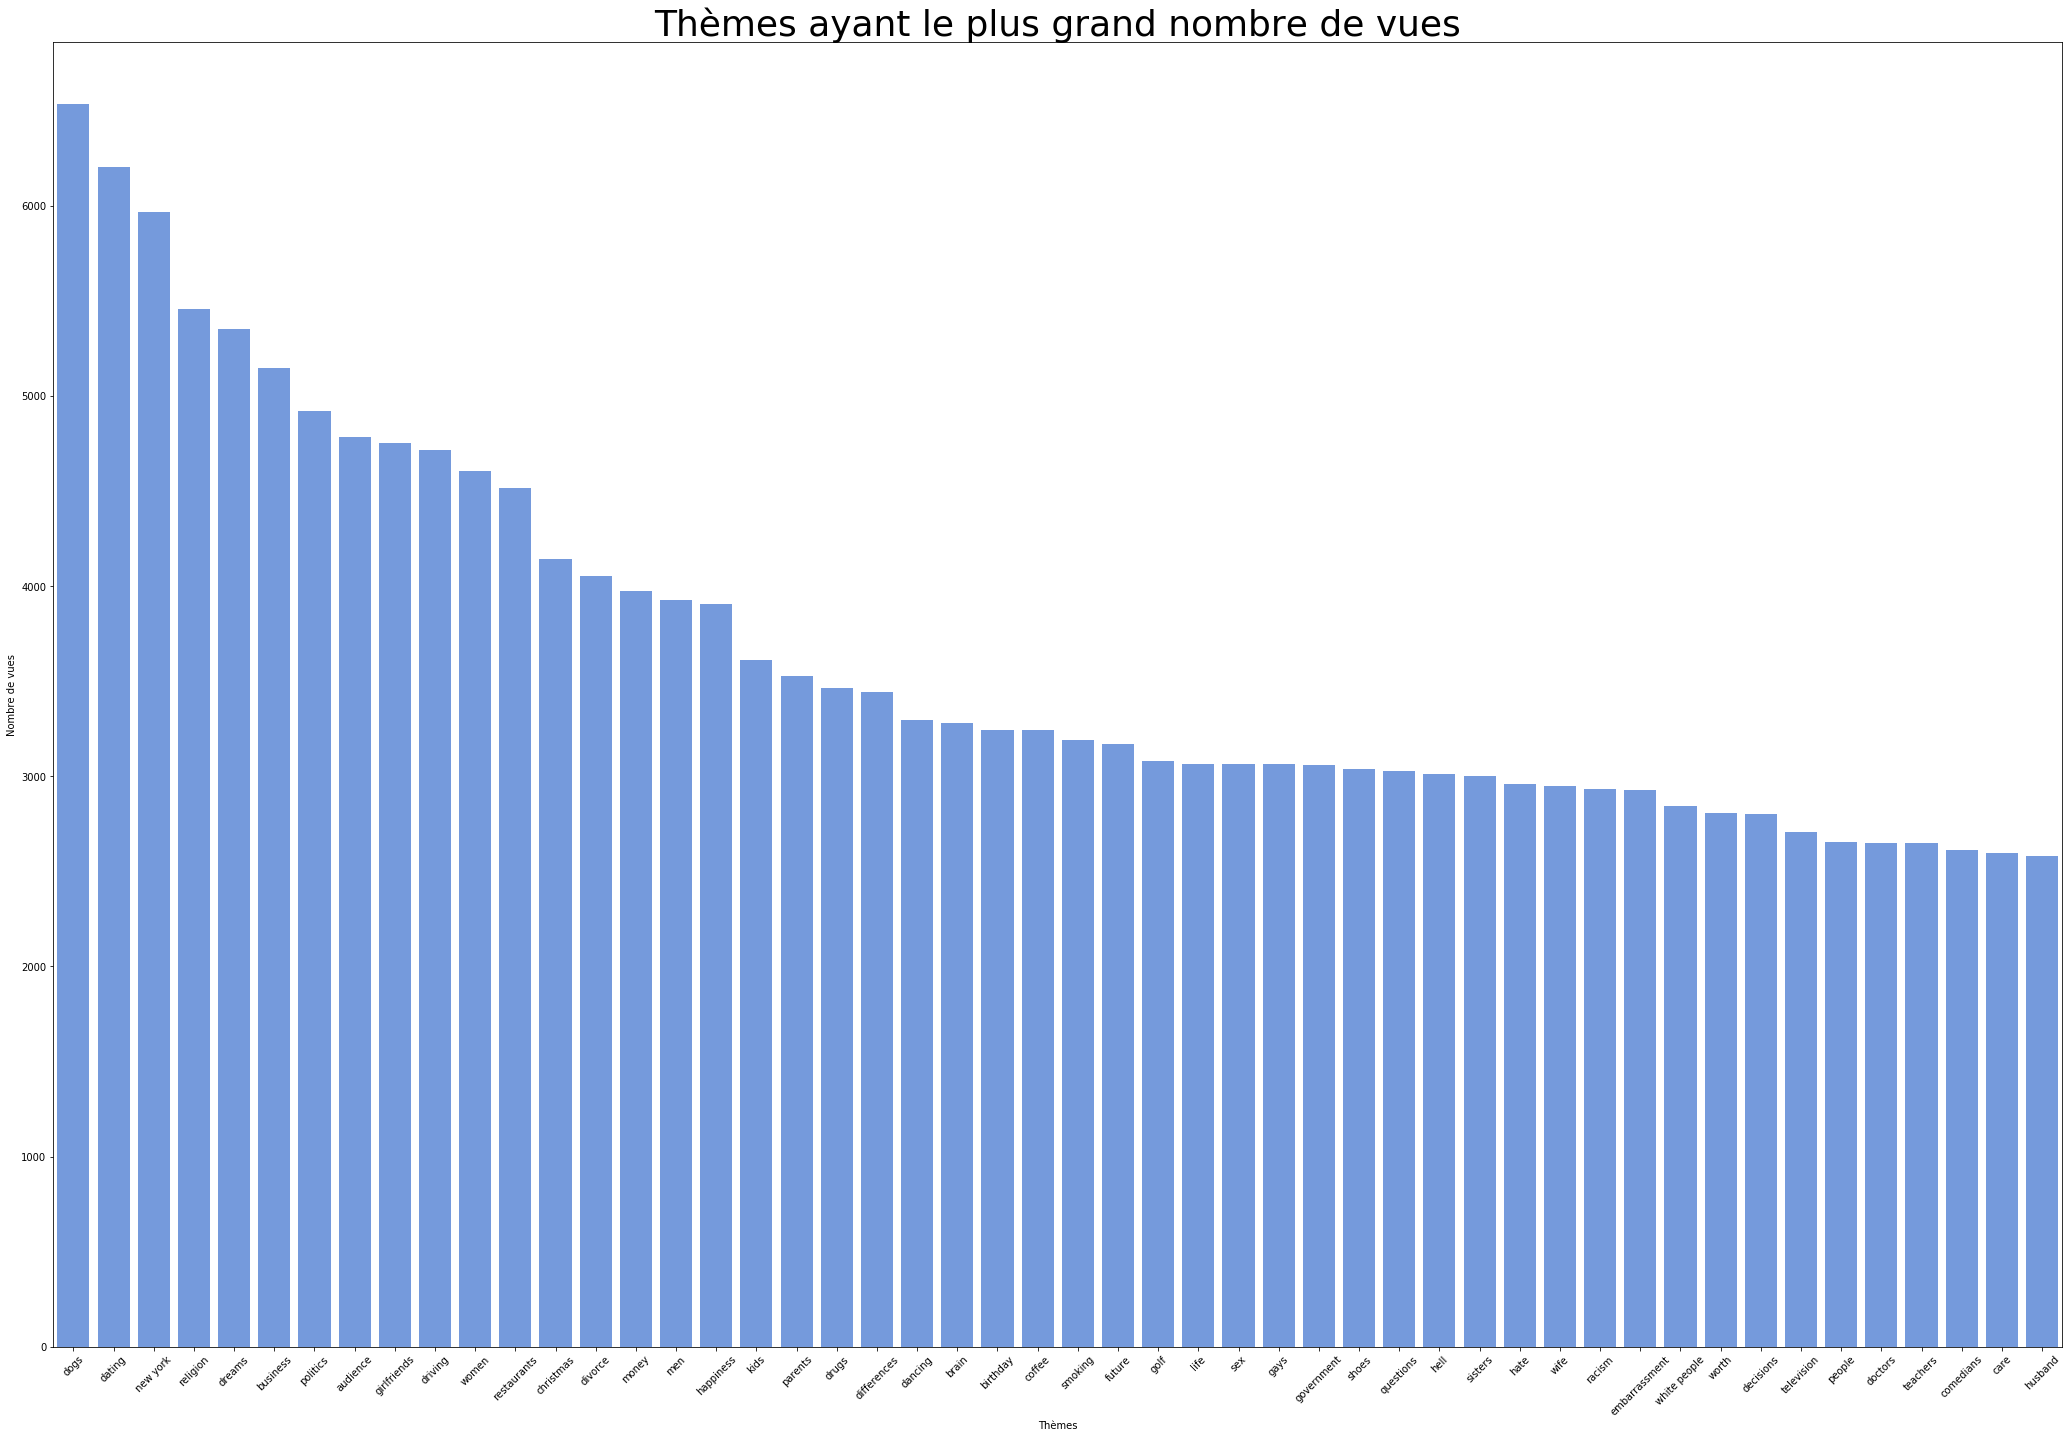

In [55]:
Top_50 = quote_df_theme.head(50)

plt.figure(figsize=(36,24))

sns.barplot(x='theme',y='nbre_vues',data=Top_50, color = 'cornflowerblue')
plt.title("Thèmes ayant le plus grand nombre de vues", fontsize=36)
plt.xticks(rotation=45)
ax = plt.axes()
ax = ax.set(xlabel='Thèmes', ylabel="Nombre de vues")

#### <span style="color: #a40334"> Ces thèmes sont-ils toujours abordés par les mêmes comédiens ? </span>

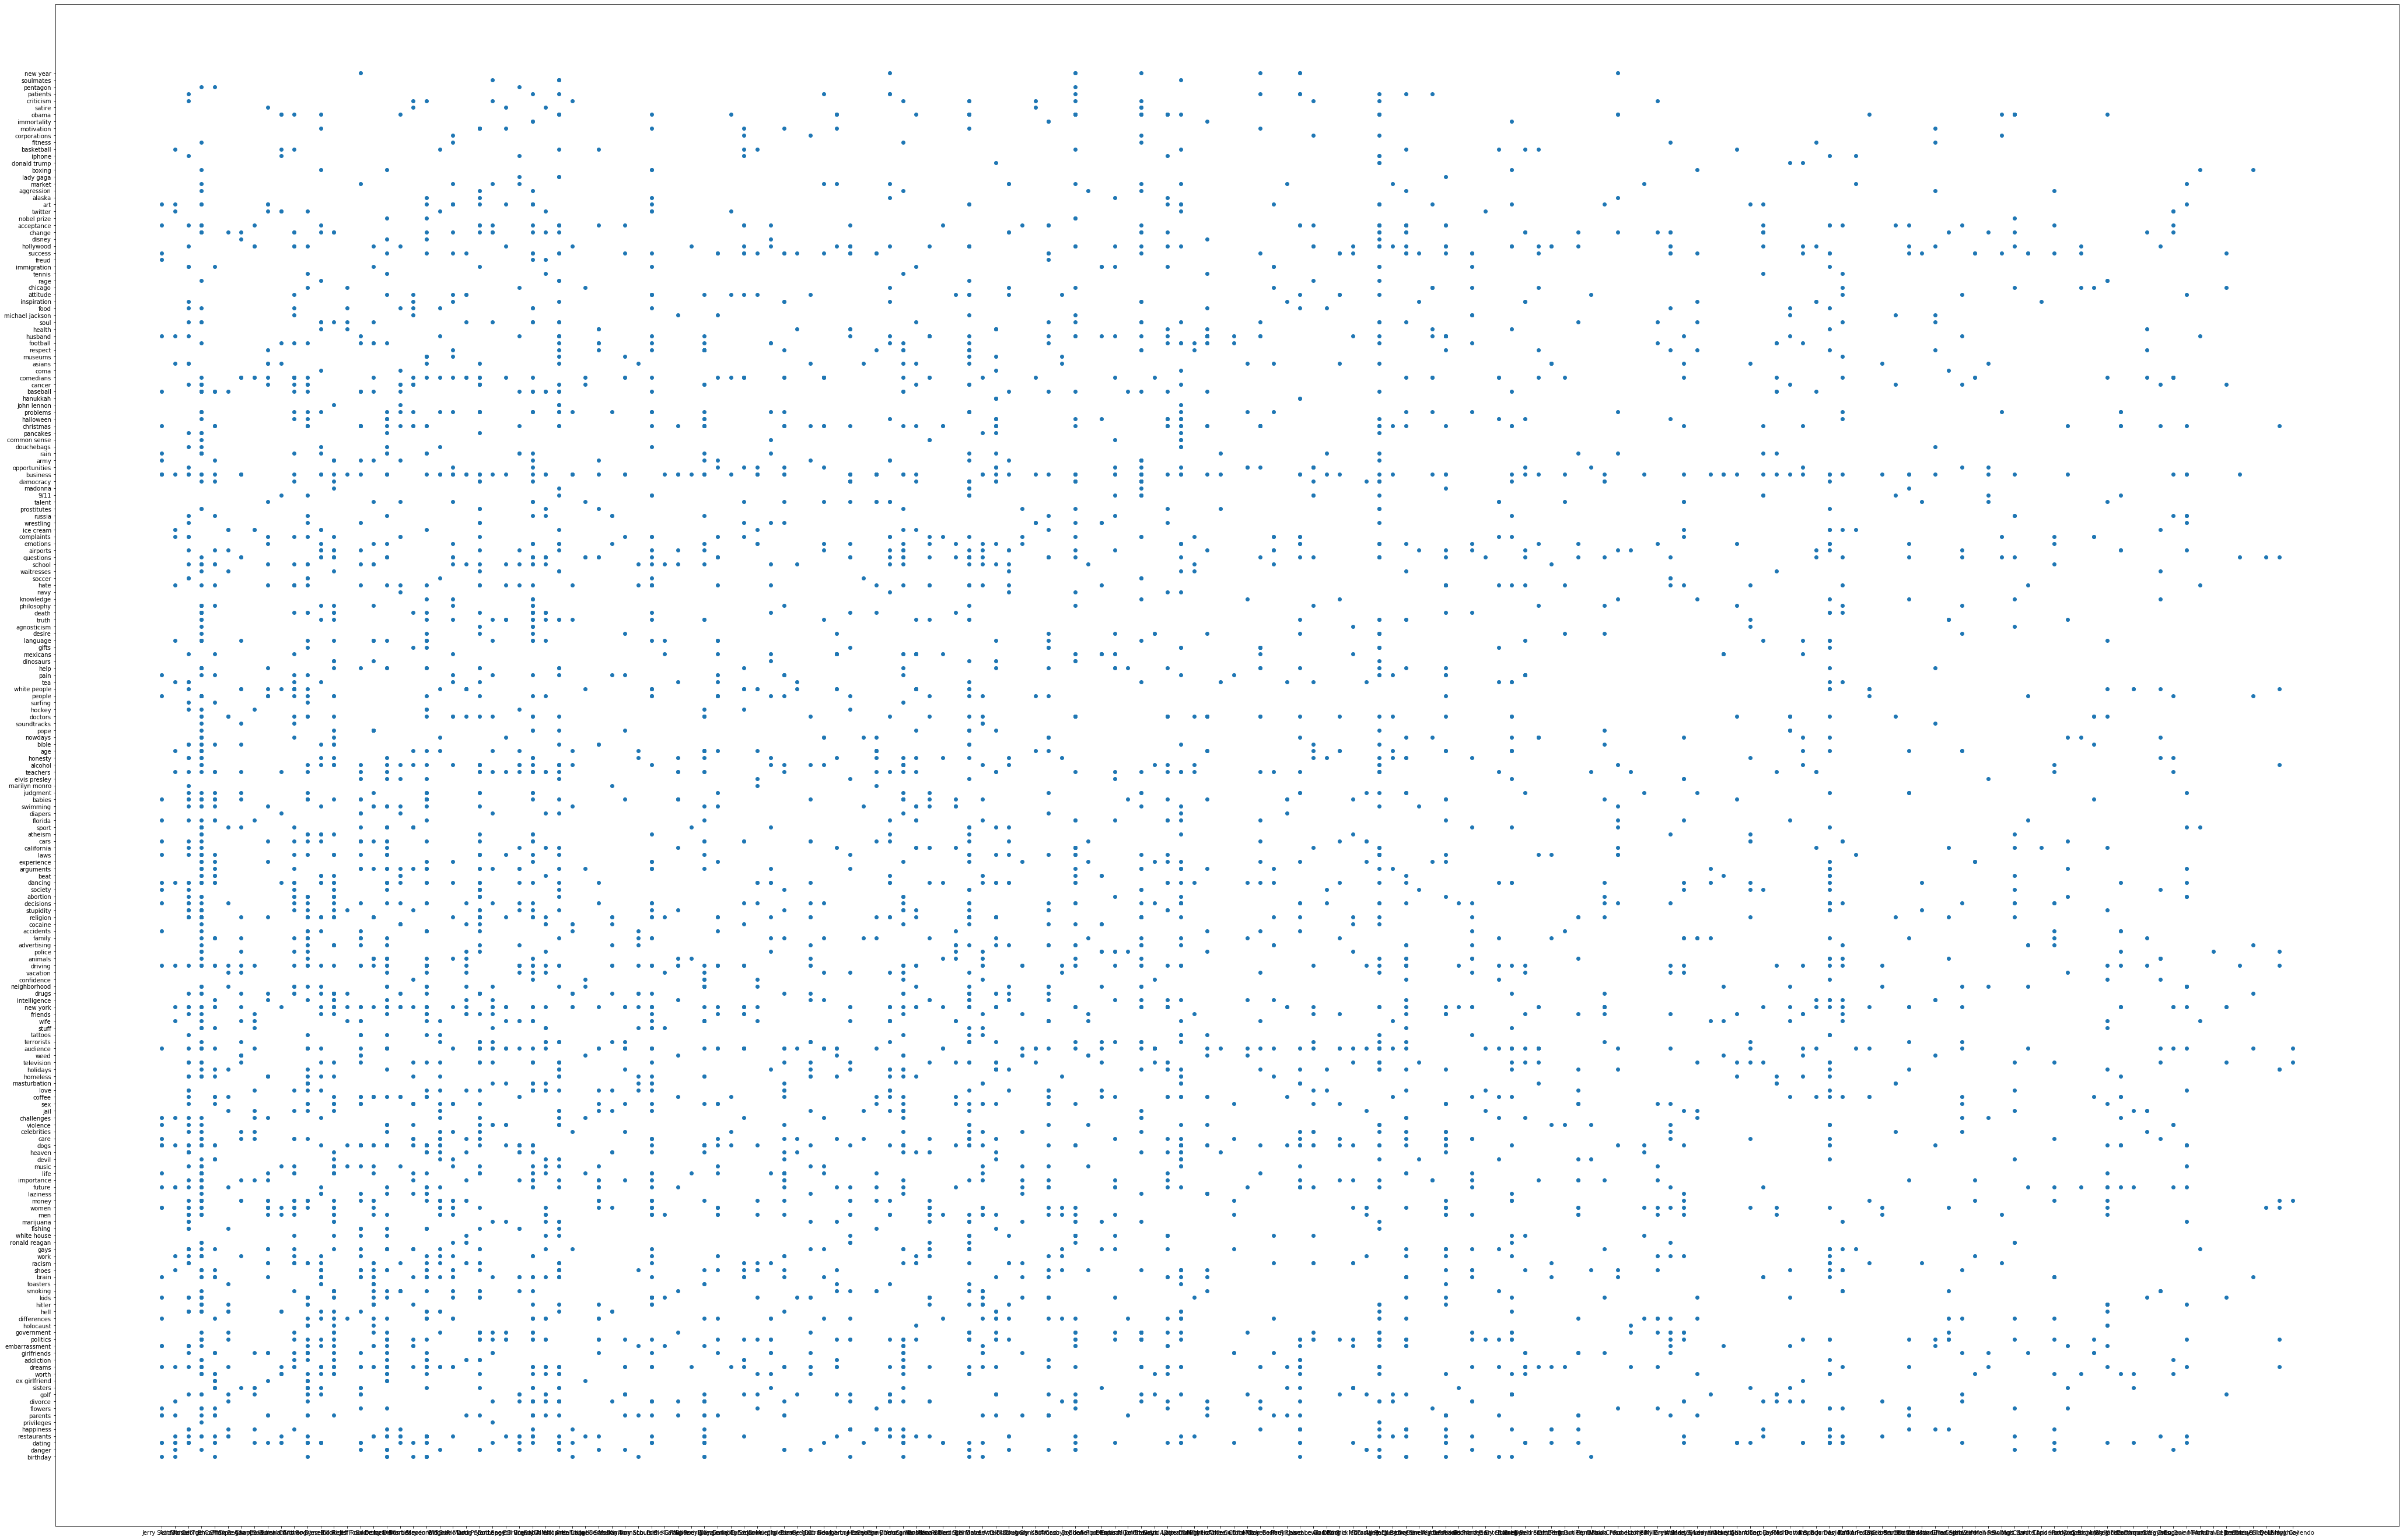

In [56]:
# Nuage de points, en abscisse : nom des comédiens / en ordonnée : nom des thèmes
quote_df_theme_auteur = quote_df.explode('theme')\
                                .dropna()

plt.figure(figsize=(72,48))
#sns.jointplot('auteur','theme',data=quote_df_theme_auteur)
plt.scatter(quote_df_theme_auteur.auteur, quote_df_theme_auteur.theme)

### <span style="color: #030aa4">Quels humoristes ont le plus de succès ?</span>

#### <span style="color: #a40334"> Quel est celui dont la citation a le plus de nombre de vues ?</span>

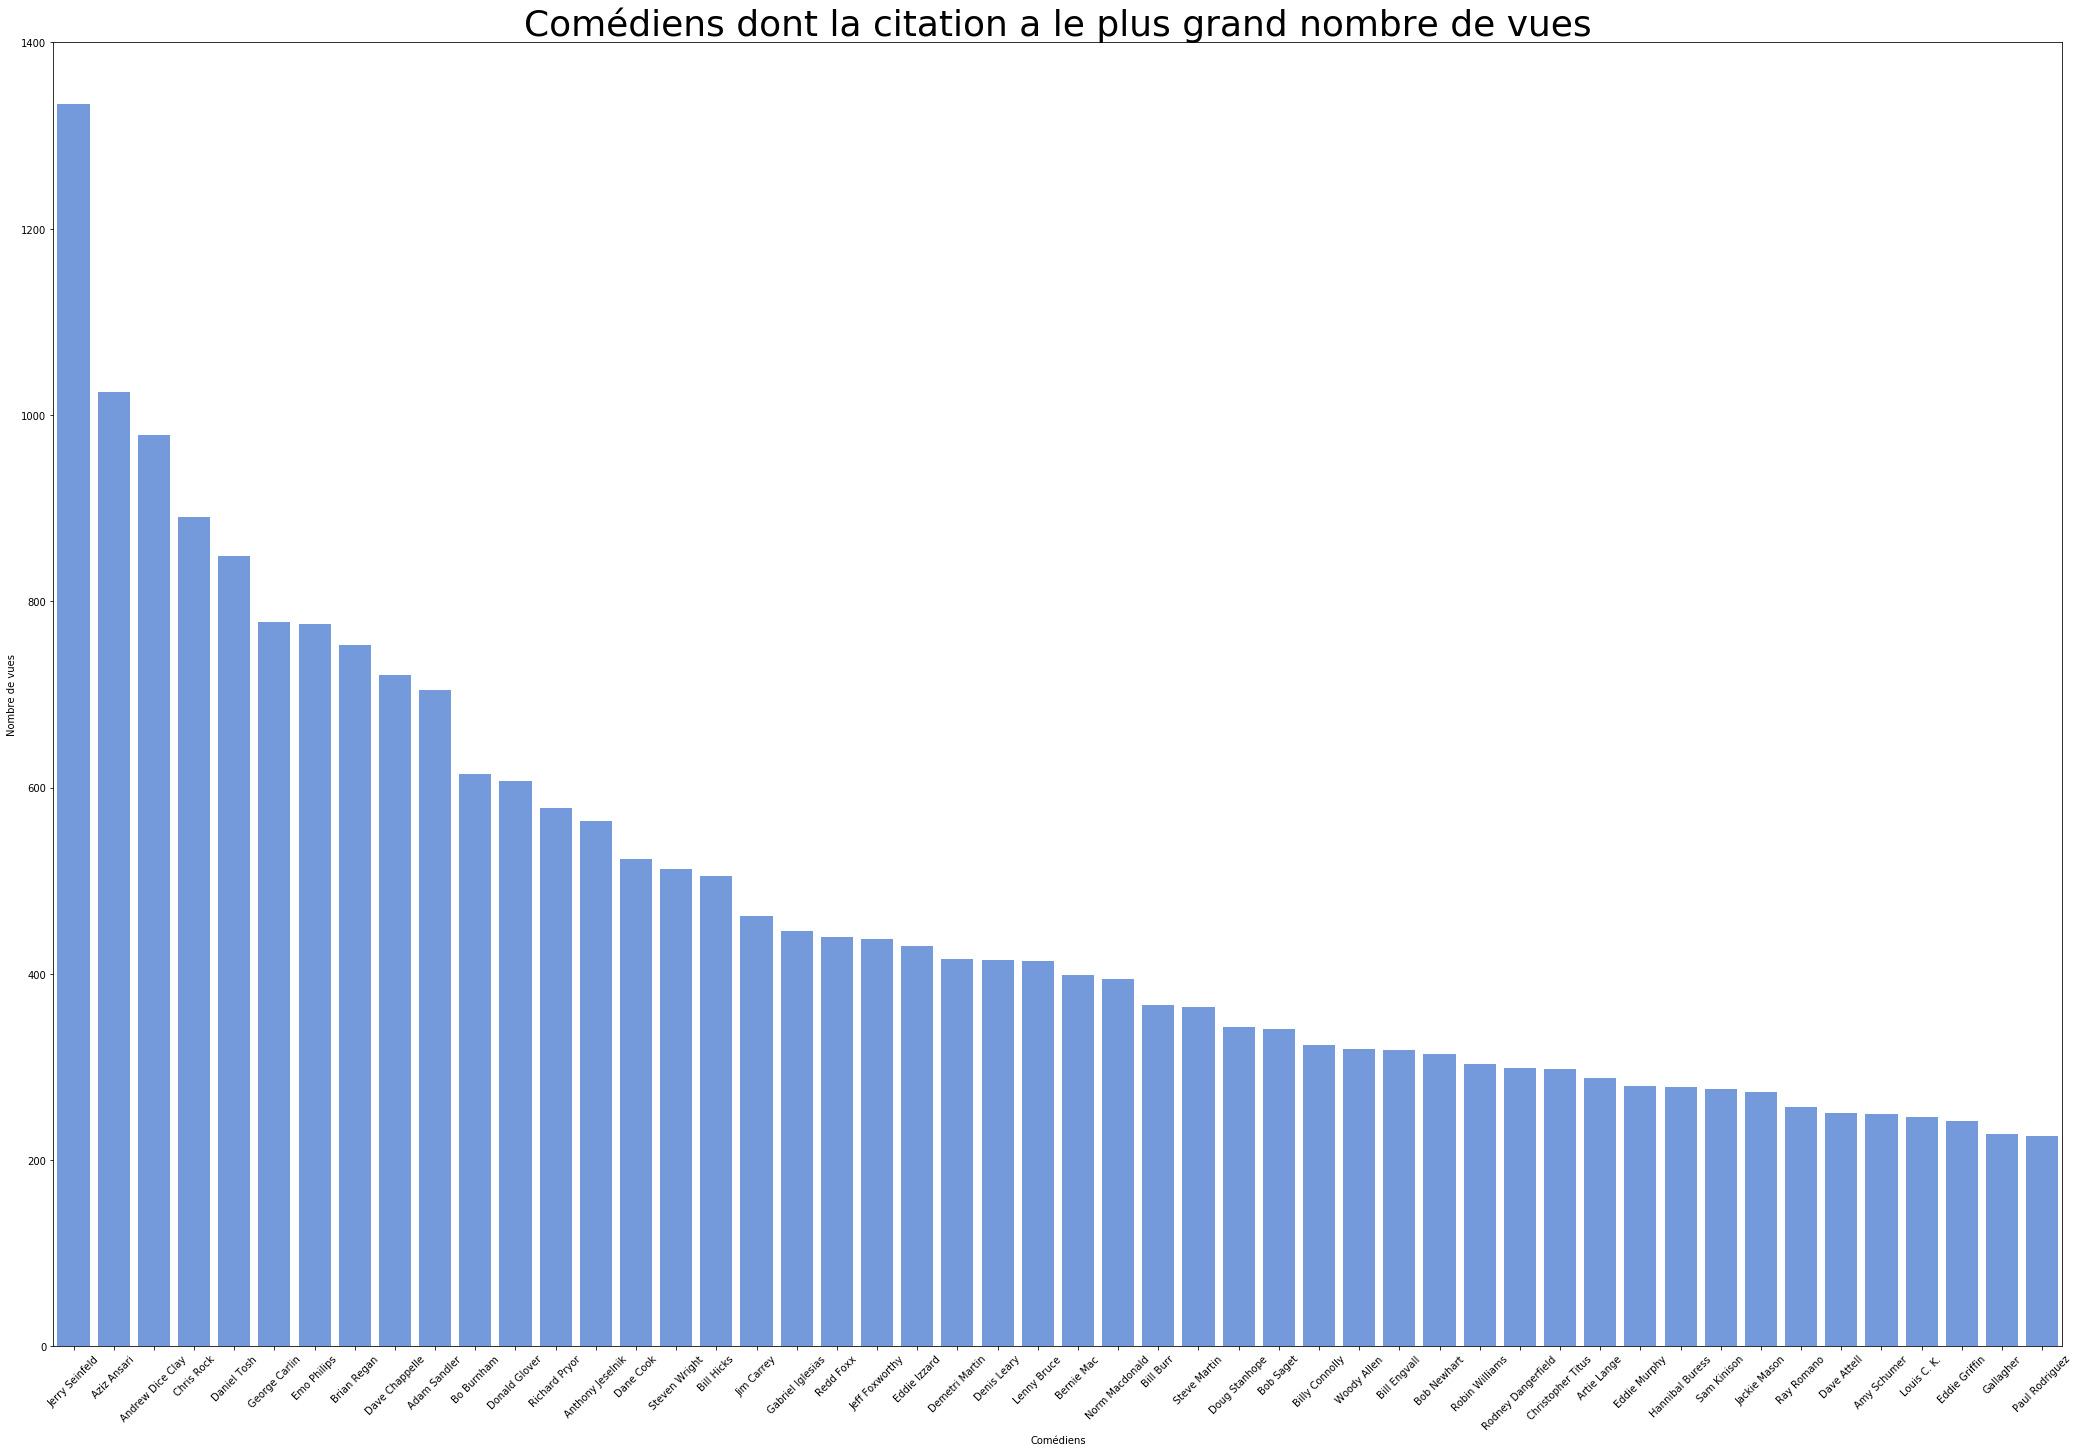

In [57]:
# Histogramme, en abscisse : nom des comédiens / en ordonnée : nombre de vues
quote_df_auteur_max_nbre_vues = quote_df.loc[:,('auteur','nbre_vues')]\
                                    .sort_values(by='nbre_vues',ascending=False)\
                                    .drop_duplicates(subset='auteur')\
                                    .head(50)

plt.figure(figsize=(36,24))

sns.barplot(x='auteur',y='nbre_vues',data=quote_df_auteur_max_nbre_vues, color = 'cornflowerblue')
plt.title("Comédiens dont la citation a le plus grand nombre de vues", fontsize=36)
plt.xticks(rotation=45)
ax = plt.axes()
ax = ax.set(xlabel='Comédiens', ylabel="Nombre de vues")

#### <span style="color: #a40334"> Quels sont ceux dont la citation a le moins de nombre de vues ?</span>

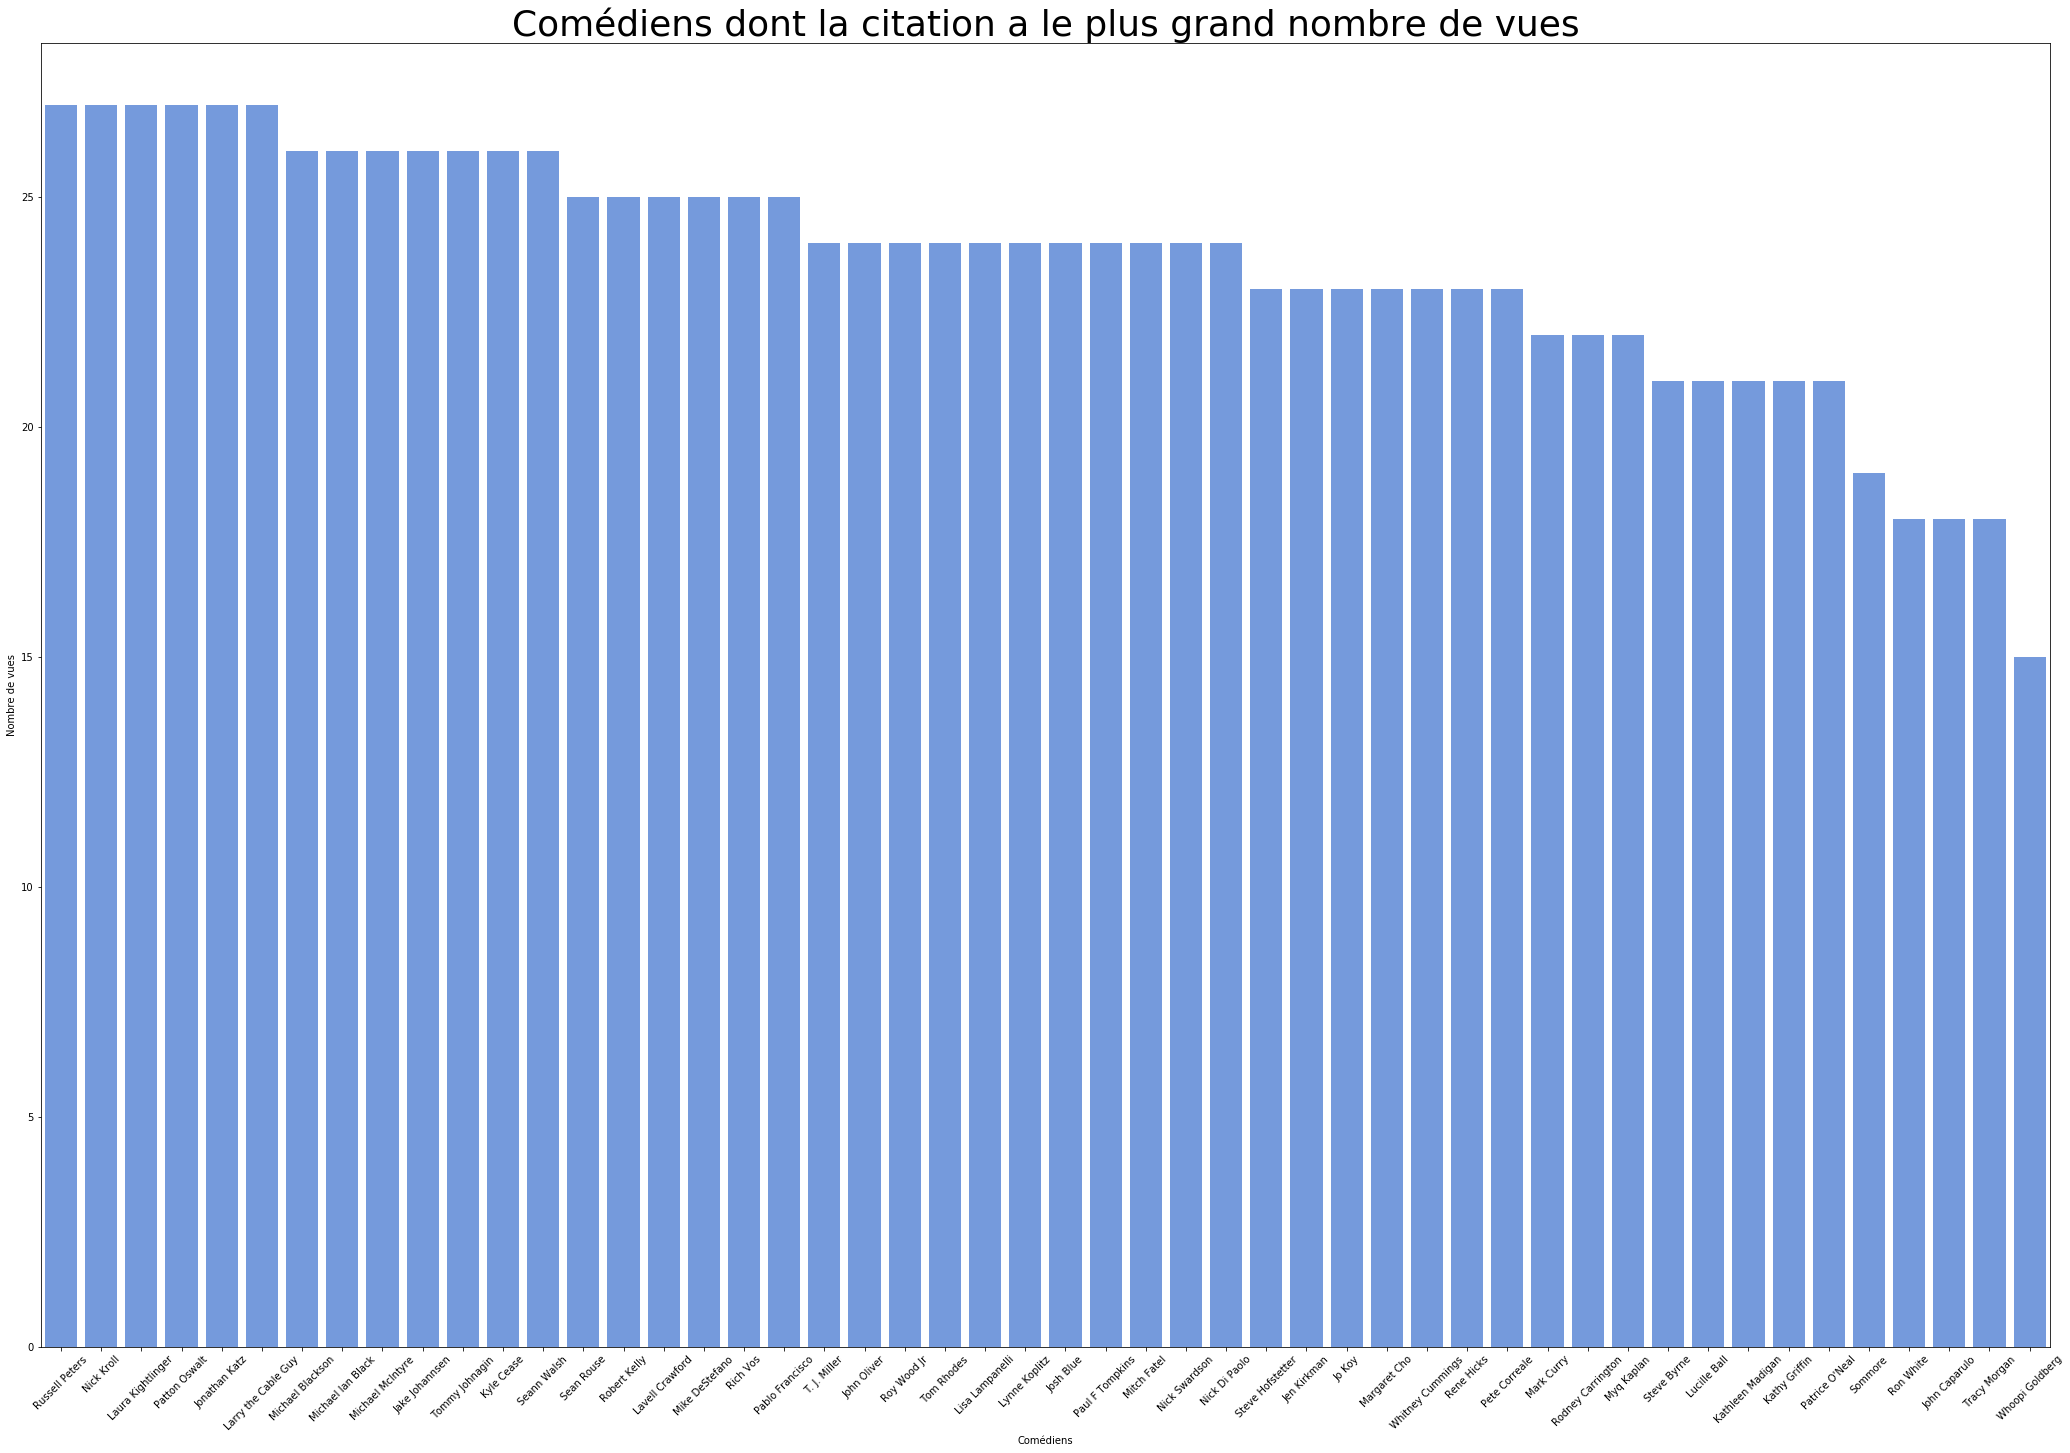

In [58]:
quote_df_auteur_min_nbre_vues = quote_df.loc[:,('auteur','nbre_vues')]\
                                    .sort_values(by='nbre_vues',ascending=False)\
                                    .drop_duplicates(subset='auteur')\
                                    .tail(50)

plt.figure(figsize=(36,24))

sns.barplot(x='auteur',y='nbre_vues',data=quote_df_auteur_min_nbre_vues, color = 'cornflowerblue')
plt.title("Comédiens dont la citation a le plus grand nombre de vues", fontsize=36)
plt.xticks(rotation=45)
ax = plt.axes()
ax = ax.set(xlabel='Comédiens', ylabel="Nombre de vues")

#### <span style="color: #a40334"> Quel est l'humoriste qui le plus grand total de nombre de vues cumulées ?</span>

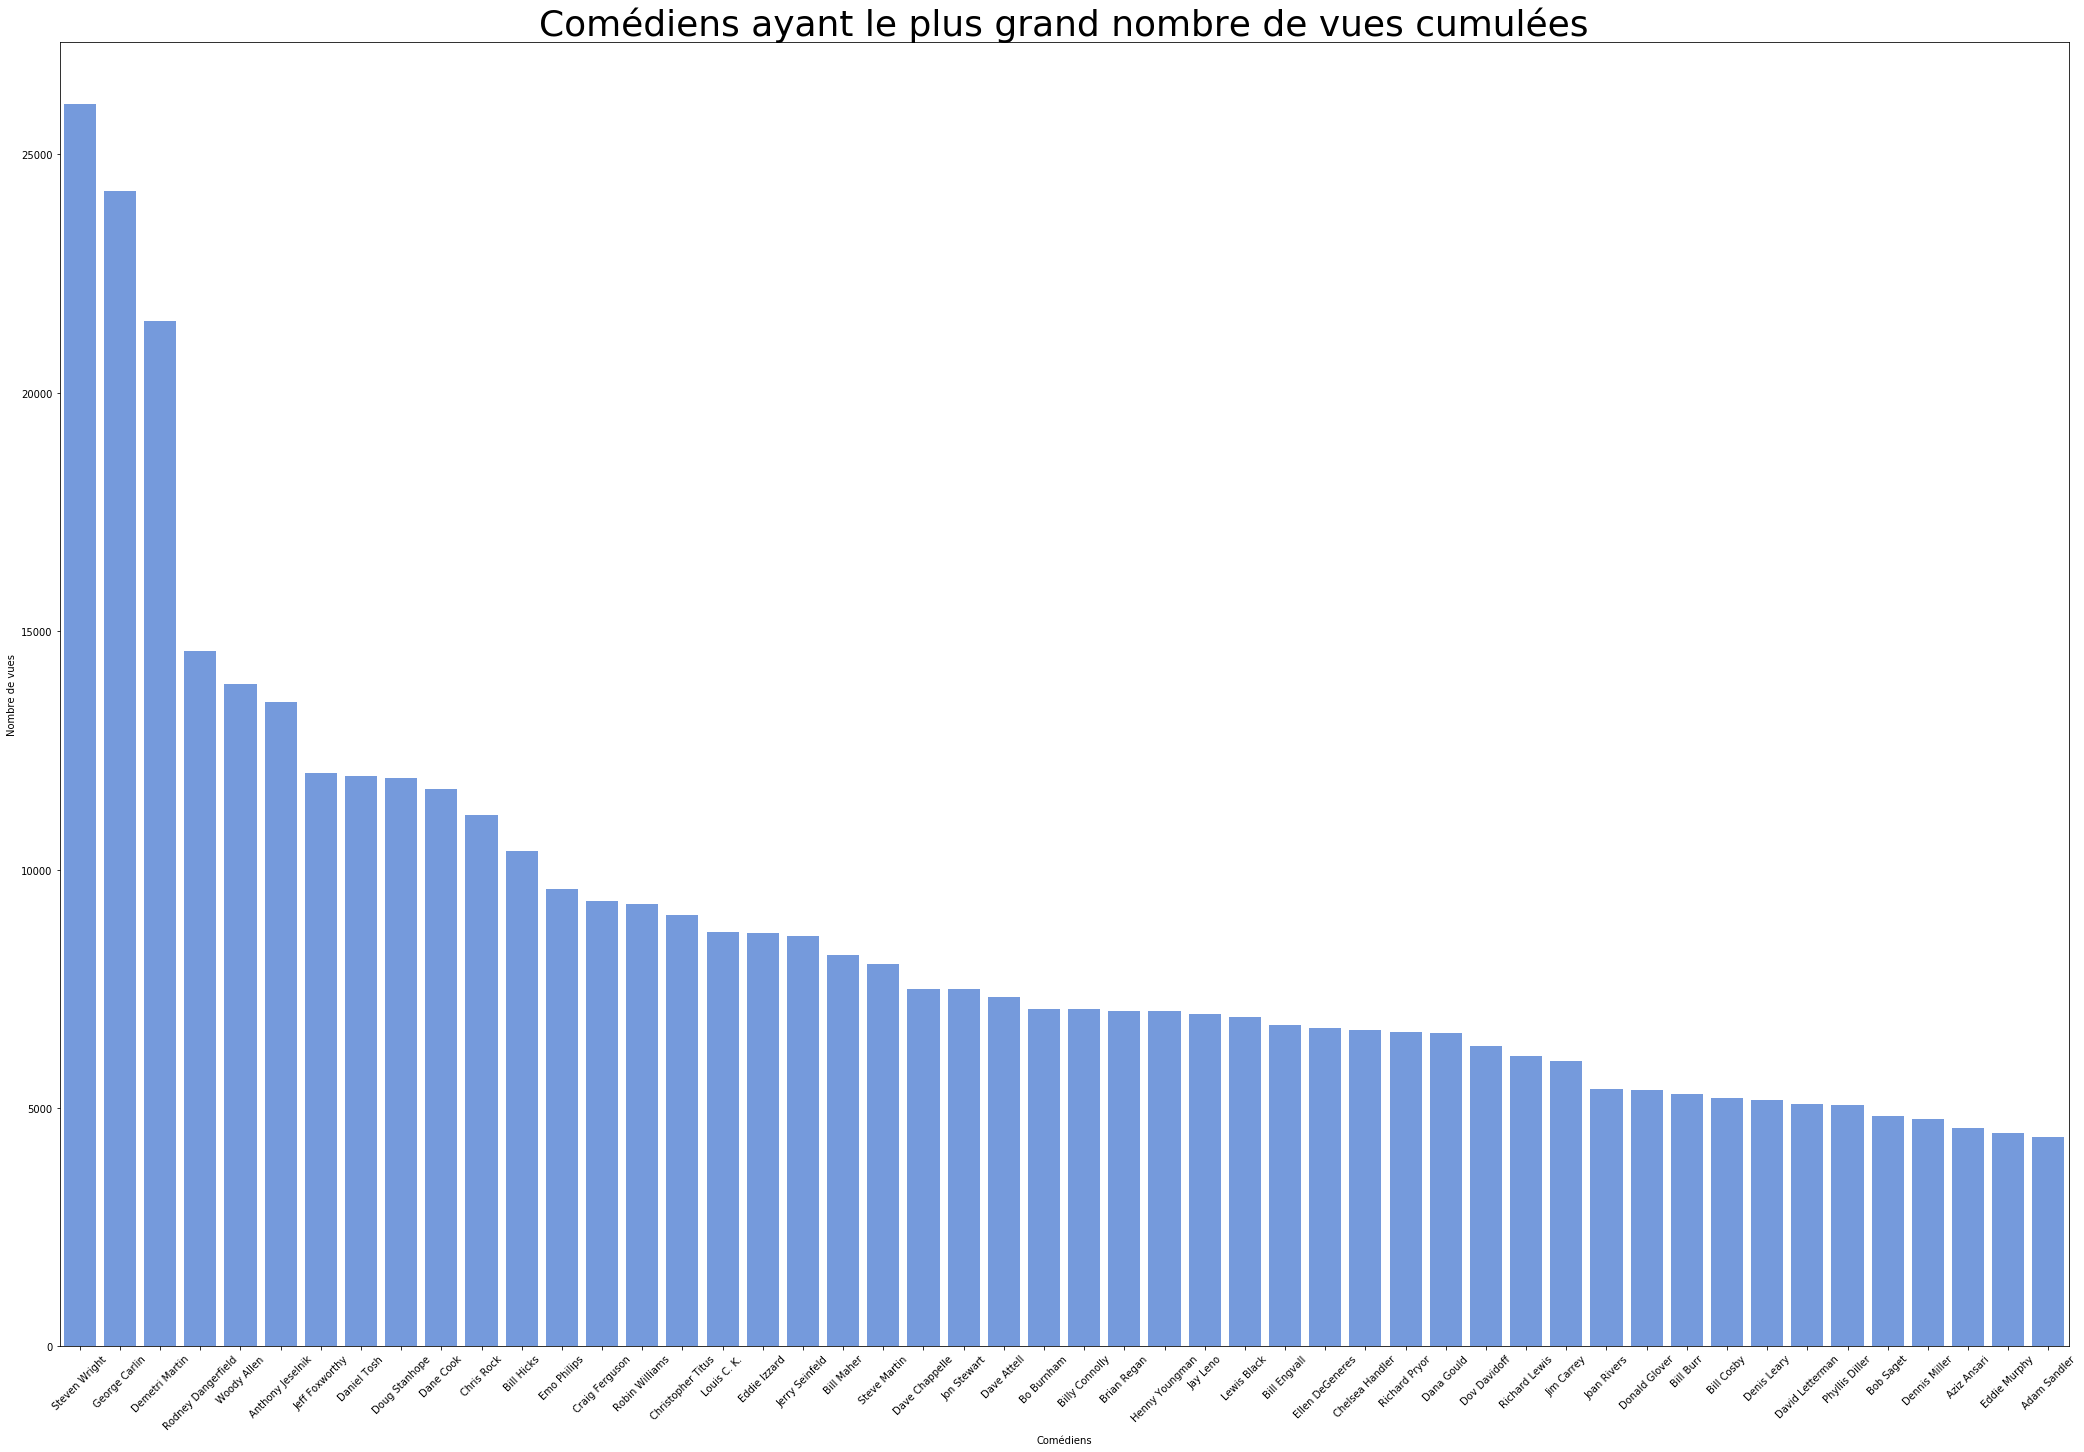

In [59]:
# Histogramme, en abscisse : nom des comédiens / en ordonnée : nombre de vues
quote_df_auteur_max_nbre_vues_cumule = quote_df.loc[:,('auteur','nbre_vues')]\
                                           .sort_values(by='nbre_vues',ascending=False)\
                                           .groupby('auteur').sum().reset_index()\
                                           .sort_values('nbre_vues',ascending=False)\
                                           .head(50)
    
plt.figure(figsize=(36,24))

sns.barplot(x='auteur',y='nbre_vues',data=quote_df_auteur_max_nbre_vues_cumule, color = 'cornflowerblue')
plt.title("Comédiens ayant le plus grand nombre de vues cumulées", fontsize=36)
plt.xticks(rotation=45)
ax = plt.axes()
ax = ax.set(xlabel='Comédiens', ylabel="Nombre de vues")

#### <span style="color: #a40334"> Quel est l'humoriste qui le plus petit total de nombre de vues cumulées ?</span>

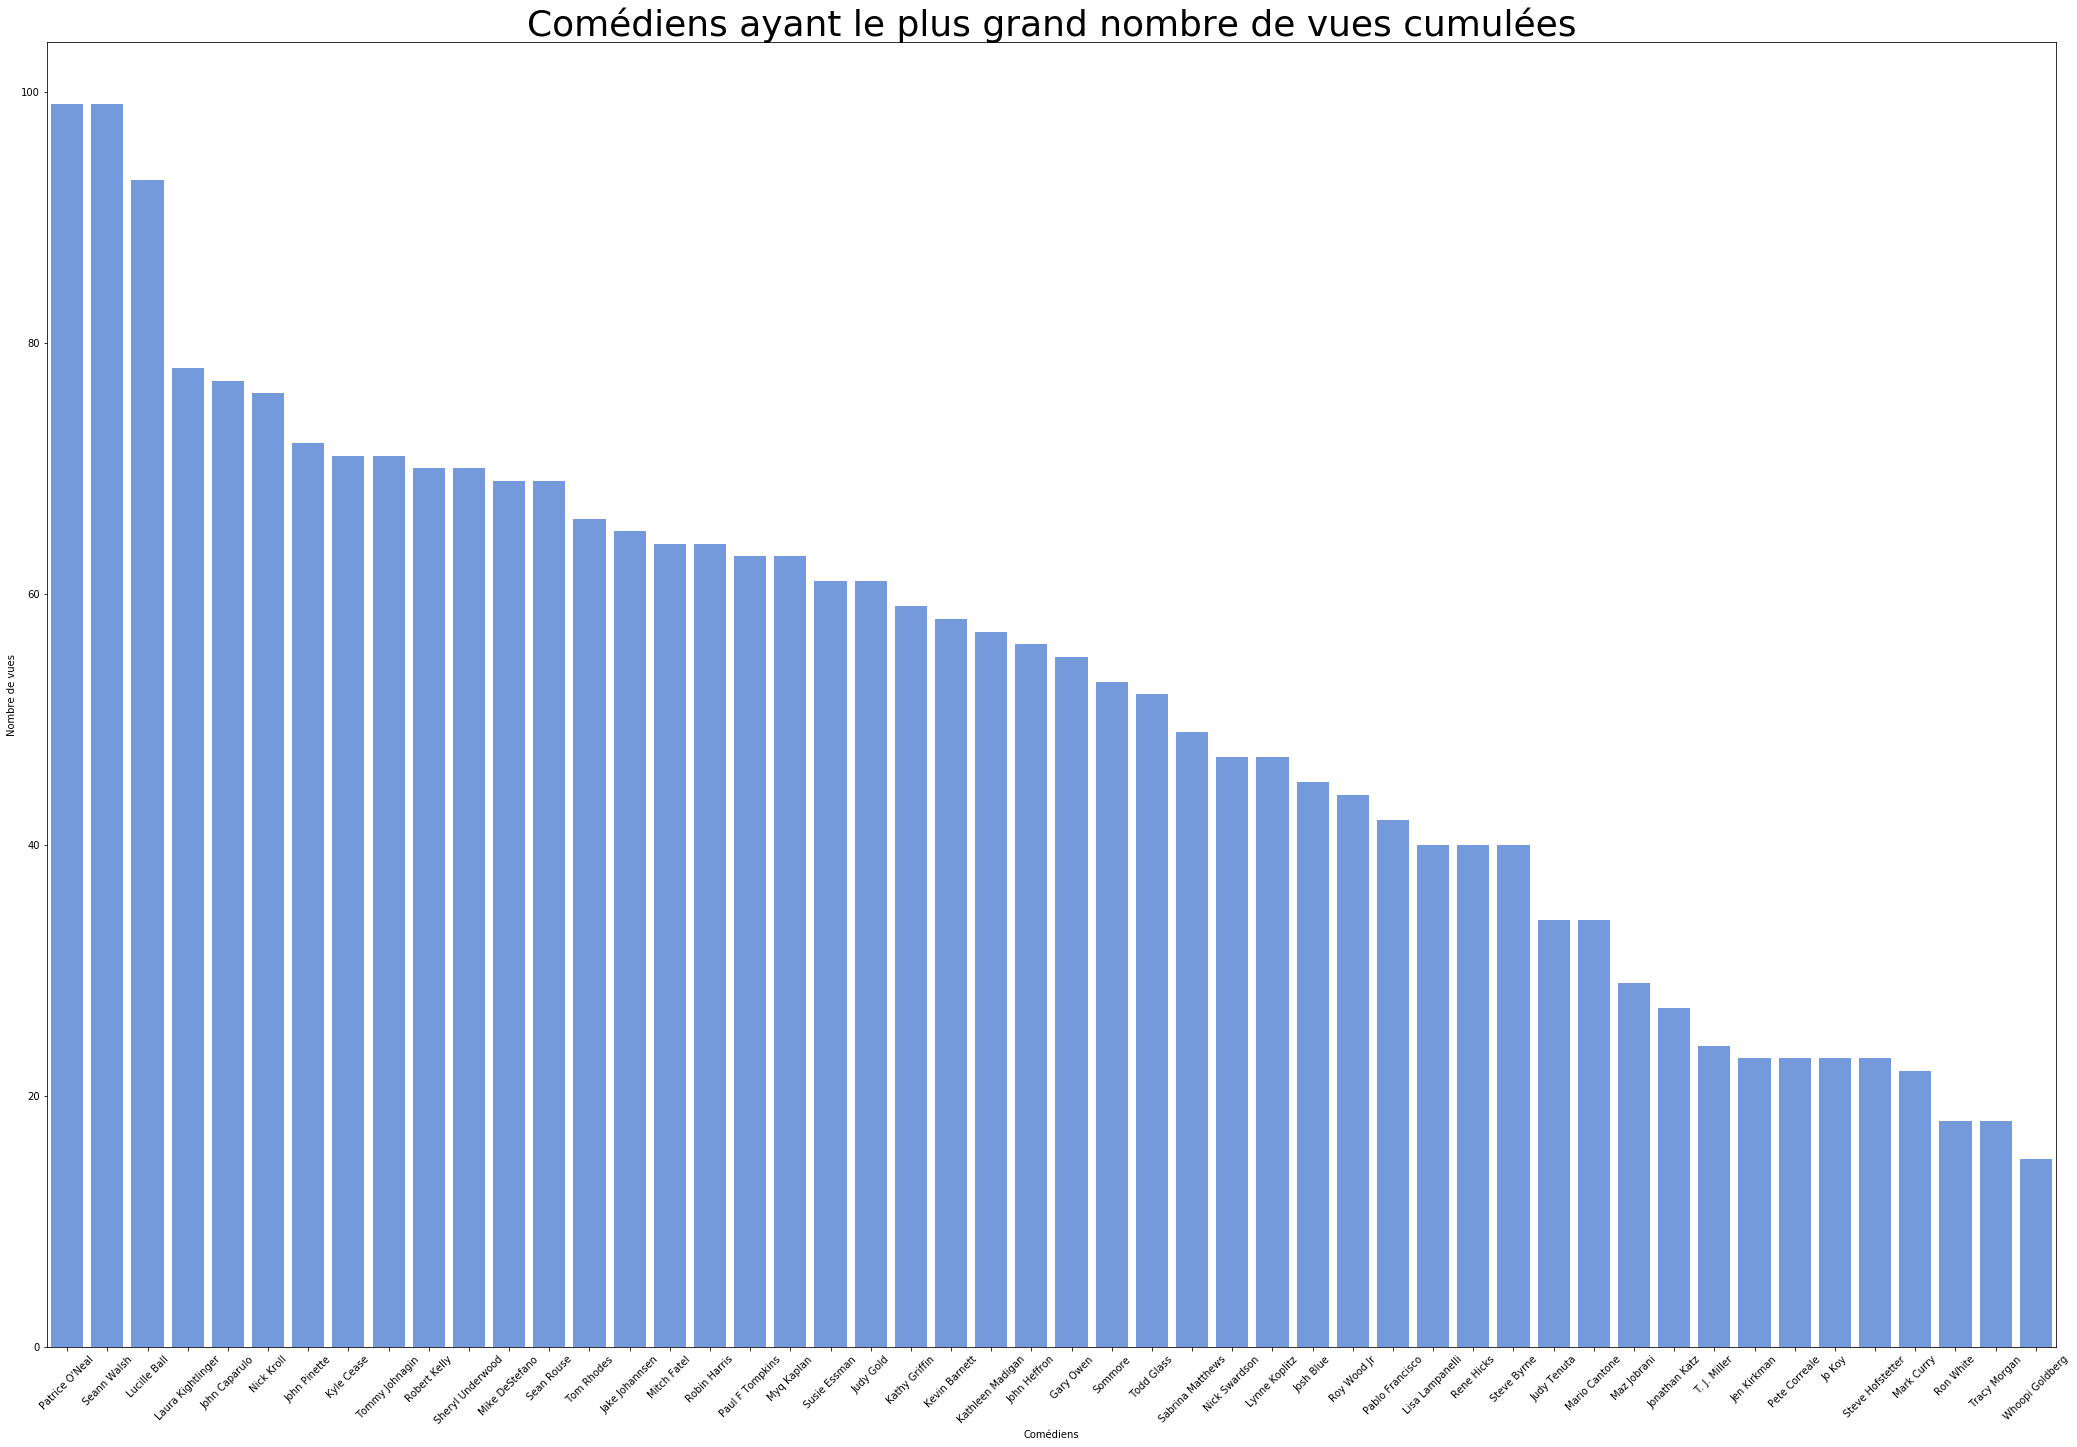

In [60]:
quote_df_auteur_min_nbre_vues_cumule = quote_df.loc[:,('auteur','nbre_vues')]\
                                               .sort_values(by='nbre_vues',ascending=False)\
                                               .groupby('auteur').sum().reset_index()\
                                               .sort_values('nbre_vues',ascending=False)\
                                               .tail(50)
    
plt.figure(figsize=(36,24))

sns.barplot(x='auteur',y='nbre_vues',data=quote_df_auteur_min_nbre_vues_cumule, color = 'cornflowerblue')
plt.title("Comédiens ayant le plus grand nombre de vues cumulées", fontsize=36)
plt.xticks(rotation=45)
ax = plt.axes()
ax = ax.set(xlabel='Comédiens', ylabel="Nombre de vues")

### <span style="color: #030aa4">Quelles citations plaisent ?</span>

#### <span style="color: #a40334"> Quelles citations ont le plus de succès ?</span>

In [66]:
quote_df.sort_values(by='nbre_vues',ascending=False)\
        .head(50)

,citation,auteur,nbre_vues,theme
0,"Well, birthdays are merely symbolic of how ano...",Jerry Seinfeld,1334,[birthday]
1,My perfect date night: I pick you up. In my Ki...,Aziz Ansari,1025,"[danger, dating, restaurants]"
2,Jack and Jill went up the hill Both with a buc...,Andrew Dice Clay,979,None
3,"I mean, they don't grade fathers. But if your ...",Chris Rock,890,None
4,"“Money doesn’t buy happiness.” Uh, do you live...",Daniel Tosh,849,[happiness]
5,Rights aren't rights if someone can take them ...,George Carlin,778,[privileges]
6,"When I was a kid my parents used to tell me, ""...",Emo Philips,776,"[parents, flowers]"
7,I have this friend who got divorced. I went go...,Brian Regan,753,"[divorce, golf]"
8,"Then Jasper said ""Look here, nigger, if anyone...",Dave Chappelle,721,[sisters]
9,"Mama says that, happiness is from magic rays o...",Adam Sandler,705,[happiness]


#### <span style="color: #a40334"> Quelles citations ont le moins de succès ?</span>

In [67]:
quote_df.sort_values(by='nbre_vues',ascending=False)\
        .tail(50)

,citation,auteur,nbre_vues,theme
18859,I just don't feel like you're right for me... ...,Dov Davidoff,6,None
18860,I wish I could be attracted to unattractive wo...,Dov Davidoff,6,None
18843,Few things are as uniquely painful as bad come...,Dov Davidoff,6,None
18844,"Yeah, I'm not into sports. If someone told me ...",Mitch Hedberg,6,None
18832,"First of all, i’m not an actor - I’m an asshole.",Chelsea Handler,6,None
18842,I had to use a public restroom today. Isn't th...,Dane Cook,6,None
18831,Maybe necrophiliacs are just people that want ...,Dov Davidoff,6,None
18841,I stopped drinking when I was 17 years old bec...,Christopher Titus,6,None
18824,"A sense of humor is great - it goes a long, lo...",Chris Rock,6,None
18825,I'm neither professional fighter nor physicist...,Dov Davidoff,6,None


#### <span style="color: #a40334"> Quels mots aparaissent le plus dans les citations ?</span>

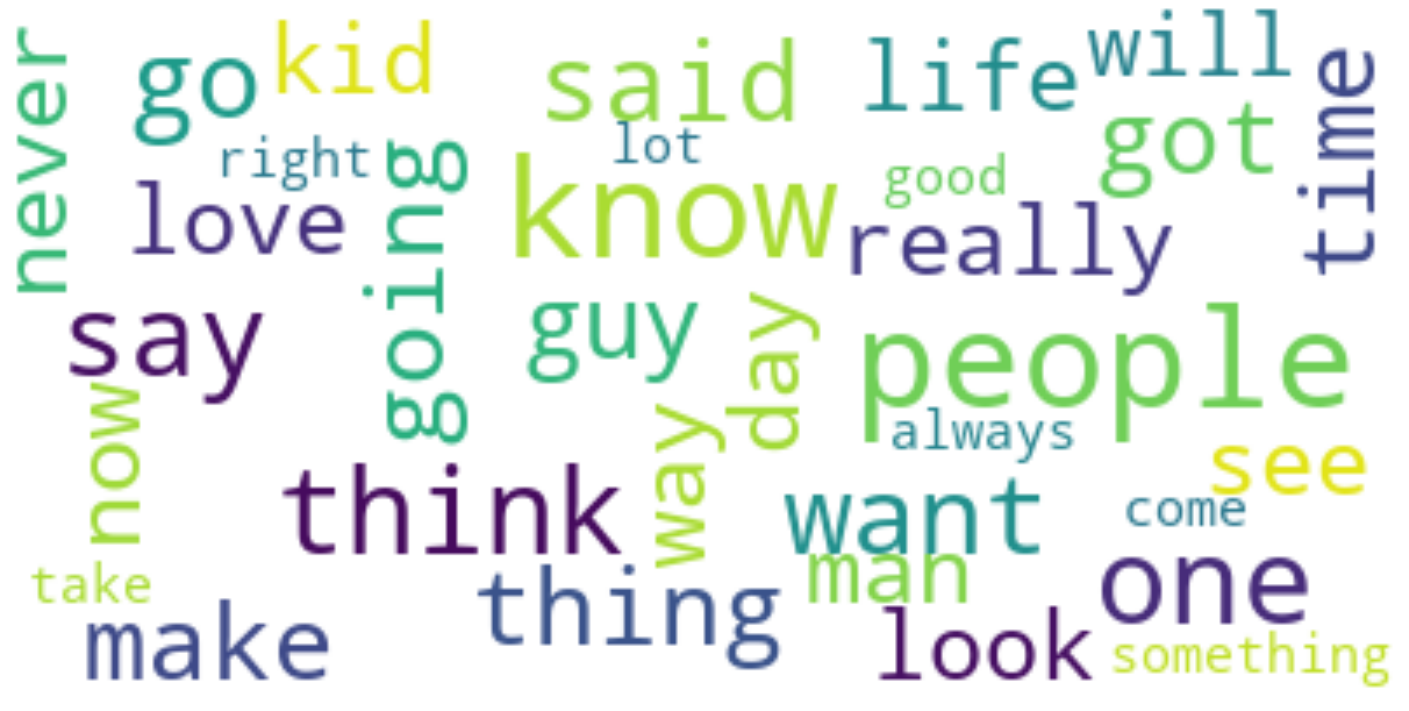

In [76]:
text=quote_df.citation

#set the stopwords list
stopwords= set(STOPWORDS)
#append new words to the stopwords list
stopwords.update(['english stopwords.txt'])


### Stopwords ne fonctionne pas
### Des mots comme think , things apparaissent encore
### Vérifier si différenciation lettre en majuscule /minuscule


wc = WordCloud(background_color="white", 
               max_words=2000, 
               min_font_size =15, 
               max_font_size=40, 
               relative_scaling = 0.5, 
               stopwords=stopwords,
               normalize_plurals= True)


wc.generate(' '.join(text))

plt.figure(figsize=(25,25))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

#Show the wordcloud
plt.show()

In [104]:
quote_df.describe()

,nbre_vues
count,18757.000000
mean,37.628352
std,42.766098
min,4.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,1334.000000


### <span style="color: #030aa4">Est-il possible de rire de tout ?</span>